In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
R = 8.31
ABEL_NOBLE_COEF = 0.5
H2_GAMMA = 1.40
R_H2 = R / 2.
K = 1e5
F = 1e1
Cp_H2 = 7/2 * R
TANK_TEMP = 50. + 273.15
TANK_PRES = 3e5

https://stackoverflow.com/questions/78585523/python-solving-non-linear-system-of-equations-issue-with-sqrt

In [3]:
def equations10(p):
    u3, T3 = p;
    return np.array([
        (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TANK_PRES,
        (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (((R_H2 * (TANK_TEMP - (TANK_TEMP - T3 - ((u3**2) / (2 * Cp_H2)) * ((F / 4) + 1)) * ((K + 1) / K))) / (np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - (u3**2 / 2) * ((F / 4) + 1))) - u3 + np.sqrt(H2_GAMMA * R_H2 * T3))) + ((K / 4) + 1) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - (u3**2 / 2) * ((F / 4) + 1)))) - TANK_PRES
    ])

In [4]:
u = np.linspace(0, 100, 500)
t = np.linspace(0, 300, 500)
U, T = np.meshgrid(u, t)
X, Y = equations10([U, T])

/tmp/ipykernel_4116/3210126654.py:4: RuntimeWarning: divide by zero encountered in divide
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TANK_PRES,
/tmp/ipykernel_4116/3210126654.py:4: RuntimeWarning: invalid value encountered in divide
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TANK_PRES,
/tmp/ipykernel_4116/3210126654.py:4: RuntimeWarning: invalid value encountered in multiply
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TAN

In [5]:
U, T = np.meshgrid(u, t)

In [6]:
X, Y = equations10([U, T])

/tmp/ipykernel_4116/3210126654.py:4: RuntimeWarning: divide by zero encountered in divide
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TANK_PRES,
/tmp/ipykernel_4116/3210126654.py:4: RuntimeWarning: invalid value encountered in divide
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TANK_PRES,
/tmp/ipykernel_4116/3210126654.py:4: RuntimeWarning: invalid value encountered in multiply
  (u3 / ABEL_NOBLE_COEF) * (1 - ((np.sqrt(H2_GAMMA * R_H2 * T3)) / u3)) * (np.sqrt((R_H2 * T3) / H2_GAMMA)  + ((K + F) / 4) * np.sqrt((2 / K) * (Cp_H2 * TANK_TEMP - Cp_H2 * T3 - ((u3**2) / 2) * ((F / 4) + 1) )) + u3 * ((F / 4) + 1)) - TAN

In [7]:
levels = np.linspace(-3e6, 3e6, 21)
levels

array([-3000000., -2700000., -2400000., -2100000., -1800000., -1500000.,
       -1200000.,  -900000.,  -600000.,  -300000.,        0.,   300000.,
         600000.,   900000.,  1200000.,  1500000.,  1800000.,  2100000.,
        2400000.,  2700000.,  3000000.])

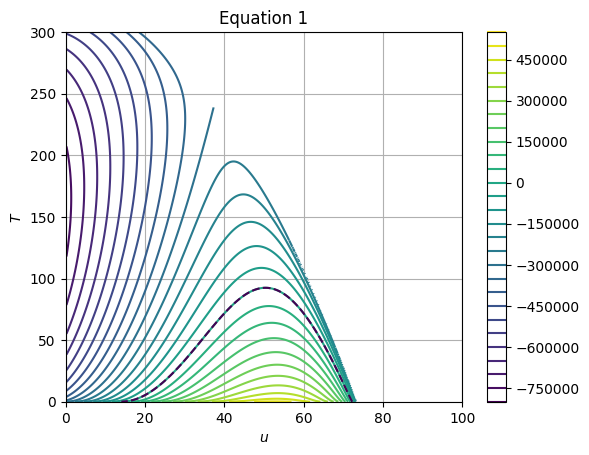

In [8]:
fig, axe = plt.subplots()
caxe = axe.contour(U, T, X, 30)
axe.contour(U, T, X, [0], linestyles="--")
cbar = fig.colorbar(caxe)
axe.set_title('Equation 1')
axe.set_xlabel("$u$")
axe.set_ylabel("$T$")
axe.grid()

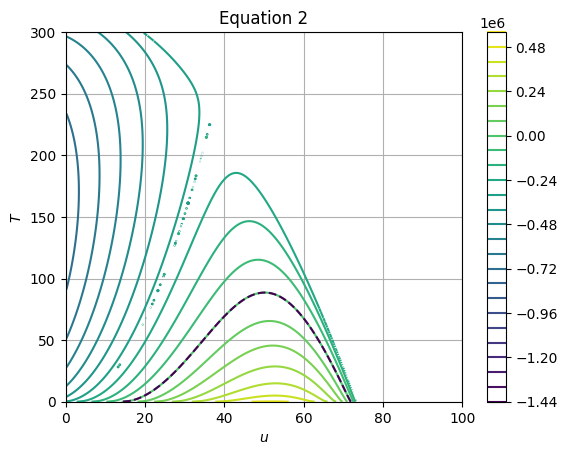

In [9]:
fig, axe = plt.subplots()
caxe = axe.contour(U, T, Y, 30)
axe.contour(U, T, Y, [0], linestyles="--")
cbar = fig.colorbar(caxe)
axe.set_title('Equation 2')
axe.set_xlabel("$u$")
axe.set_ylabel("$T$")
axe.grid()

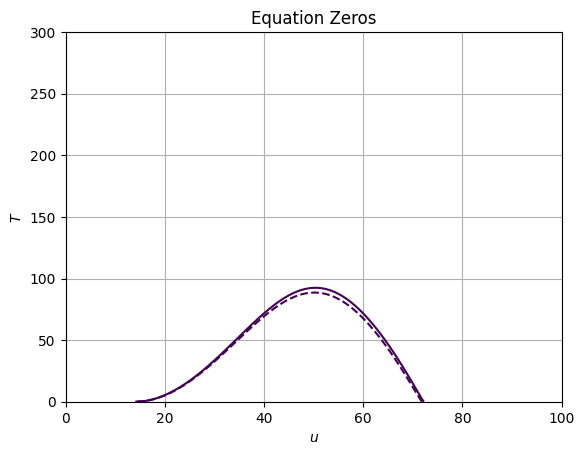

In [10]:
fig, axe = plt.subplots()
axe.contour(U, T, X, [0], linestyles="-")
axe.contour(U, T, Y, [0], linestyles="--")
axe.set_title('Equation Zeros')
axe.set_xlabel("$u$")
axe.set_ylabel("$T$")
axe.grid()

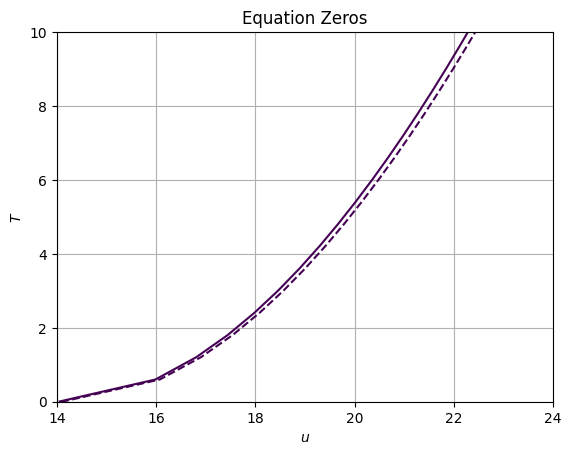

In [11]:
fig, axe = plt.subplots()
axe.contour(U, T, X, [0], linestyles="-")
axe.contour(U, T, Y, [0], linestyles="--")
axe.set_title('Equation Zeros')
axe.set_xlabel("$u$")
axe.set_ylabel("$T$")
axe.set_xlim([14, 24])
axe.set_ylim([0, 10])
axe.grid()

In [48]:
equations10([1e-8, 1e-8])

array([-300005.22873432, -300005.22840562])

In [43]:
def system(x):
    return np.array([
        x[0] - x[1] + 1.,
        x[0] - 2 * x[1] + 1.1
    ])

In [44]:
xlin = np.linspace(-5, 5, 200)
ylin = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(xlin, ylin)
U, V = system([X, Y])

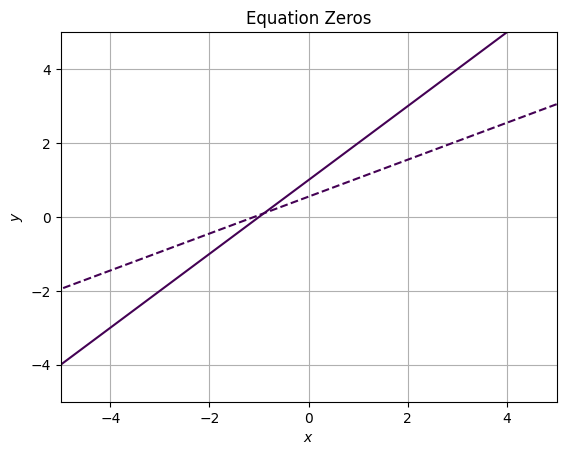

In [45]:
fig, axe = plt.subplots()
axe.contour(X, Y, U, [0], linestyles="-")
axe.contour(X, Y, V, [0], linestyles="--")
axe.set_title('Equation Zeros')
axe.set_xlabel("$x$")
axe.set_ylabel("$y$")
axe.grid()

In [46]:
optimize.fsolve(system, x0=[1, 1])

array([-0.9,  0.1])